In [ ]:
# Ok the first thing i'm going to do is try a fit a GradientBoostingClassifier with minimal modification to get a result
# I will also probably just throw a few other models to see what comes back for baseline models

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling as pp

In [5]:
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn.model_selection import cross_val_score


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv('.\\training.csv', index_col='Client')

In [8]:
df.head()

,viable_candidate,Top_Value,Catagory_Label,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Has_ActBal_CA,Has_ActBal_SA,Has_ActBal_MF,Has_ActBal_OVD,Has_ActBal_CC,Has_ActBal_CL,Has_VolumeCred,Has_VolumeCred_CA,Has_TransactionsCred,Has_TransactionsCred_CA,Has_VolumeDeb,Has_VolumeDeb_CA,Has_VolumeDebCash_Card,Has_VolumeDebCashless_Card,Has_VolumeDeb_PaymentOrder,Has_TransactionsDeb,Has_TransactionsDeb_CA,Has_TransactionsDebCash_Card,Has_TransactionsDebCashless_Card,Has_TransactionsDeb_PaymentOrder
Client,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1094,1.0,5.138571,2,0,1,0,0.000000,5.138571,0.0000,0,25,8,1,0.0,0.0,0.0,0.0,0.0,89.022500,0.0000,0.0,0.0,0.0,0.0,0.011786,0.011786,1.0,1.0,1366.313929,1366.313929,53.571429,351.950357,891.327857,31.0,31.0,1.0,21.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1484,1.0,25.609107,3,1,0,1,25.609107,0.000000,8.7225,0,39,0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,1355.088571,1355.088571,5.0,5.0,768.625000,768.625000,107.142857,302.446429,357.785714,23.0,23.0,1.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
20,1.0,3.822500,2,0,1,0,0.000000,3.822500,0.0000,0,27,181,1,1.0,0.0,0.0,0.0,0.0,2194.472143,18302.0625,0.0,0.0,0.0,0.0,452.617500,451.550000,4.0,3.0,221.428571,221.428571,107.142857,10.714286,103.571429,7.0,7.0,3.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1193,0.0,0.000000,0,0,0,0,0.000000,0.000000,0.0000,0,48,16,2,0.0,0.0,1.0,0.0,0.0,4180.697500,0.0000,0.0,0.0,0.0,0.0,1442.837857,1151.652857,23.0,21.0,1661.201071,1207.906429,507.142857,331.150000,75.178571,55.0,36.0,6.0,21.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
142,0.0,0.000000,0,0,0,0,0.000000,0.000000,0.0000,1,27,183,1,0.0,0.0,0.0,0.0,0.0,1511.683929,0.0000,0.0,0.0,0.0,0.0,714.285714,714.285714,1.0,1.0,728.107143,728.107143,0.000000,0.000000,725.928571,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


In [5]:
profile = pp.ProfileReport(df)
profile.to_file(".\\your_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]


In [7]:
total = pd.read_csv('.\\total_data.csv', index_col='Client')
profile = pp.ProfileReport(total)
profile.to_file(".\\total_data_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


In [51]:
test = pd.read_csv('.\\test.csv', index_col='Client')
profile = pp.ProfileReport(test)
profile.to_file(".\\test_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


In [9]:
# data without labels
X = df.iloc[:, 8:]

In [10]:
y = df['Catagory_Label']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)

train_acc_cv = cross_val_score(clf, X_train, y_train, cv=10)
clf.predict(X_test[:2])

test_acc = clf.score(X_test, y_test)

In [189]:
print(test_acc)

0.4691358024691358


In [13]:
# Alright cool we have a baseline model. Now lets see just how bad it is

In [14]:
y.value_counts(normalize=True)

0    0.412797
3    0.299278
2    0.178535
1    0.109391
Name: Catagory_Label, dtype: float64

In [15]:
# Awesome the model beats blindly guessing everyone doesn't belong to one of the catagories. It is always a win when that happens and given that I haven't manipulated the data in anyway seems promising

In [16]:
train_acc_cv.mean()

0.4118531202435312

In [17]:
#Unfortunelty cross validation accuracy was a lot lower and actually falls below blindly guessing

<BarContainer object of 10 artists>

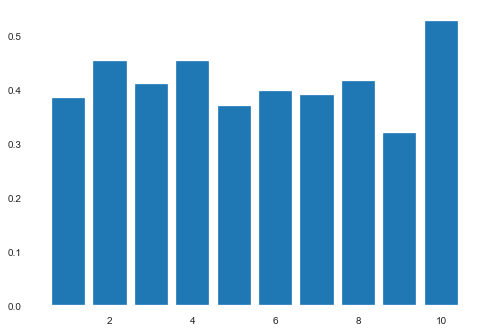

In [18]:
# Plot for accuracy on train set
x = [x for x in range(1,11)]
plt.bar(x,train_acc_cv) 


In [19]:
# No no for the tree model
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.predict(X_test[:2])
clf.score(X_test, y_test)


0.37037037037037035

In [20]:
# Also a poor performance from an MLP but which such small data this is to be expected
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(30,), random_state=1)
clf.fit(X_train, y_train)
clf.predict(X_test[:2])
clf.score(X_test, y_test)

0.42386831275720166

In [32]:
predictors = X.columns

# Perform feature selection where `k` (5 in this case) indicates the number of features we wish to select
selector = SelectKBest(f_classif, k=10)
selector.fit(X[predictors], y)


SelectKBest()


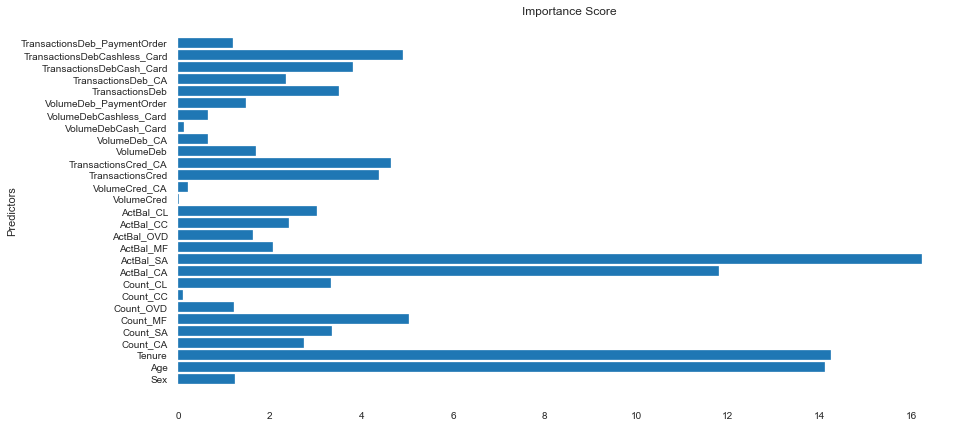

In [30]:
importance_score = -np.log(selector.pvalues_)

# Plot each column with their importance score
plt.rcParams["figure.figsize"] = [14,7]
plt.barh(range(len(predictors)), importance_score, color='C0')
plt.ylabel("Predictors")
plt.title("Importance Score")
plt.yticks(range(len(predictors)), predictors)

plt.show()

In [45]:
best_features = pd.DataFrame({'features': predictors, 'scores': importance_score})

In [49]:
# Best 8 features
best_features.sort_values('scores', ascending = False).head(8)

,features,scores
10,ActBal_SA,16.246843
2,Tenure,14.259223
1,Age,14.127505
9,ActBal_CA,11.810057
5,Count_MF,5.031908
27,TransactionsDebCashless_Card,4.910082
18,TransactionsCred_CA,4.639062
17,TransactionsCred,4.377732


In [ ]:
# Worst 8 features

In [50]:
best_features.sort_values('scores', ascending = True).head(8)

,features,scores
15,VolumeCred,0.023397
7,Count_CC,0.092689
21,VolumeDebCash_Card,0.131058
16,VolumeCred_CA,0.205955
22,VolumeDebCashless_Card,0.639248
20,VolumeDeb_CA,0.650345
28,TransactionsDeb_PaymentOrder,1.192466
6,Count_OVD,1.222815


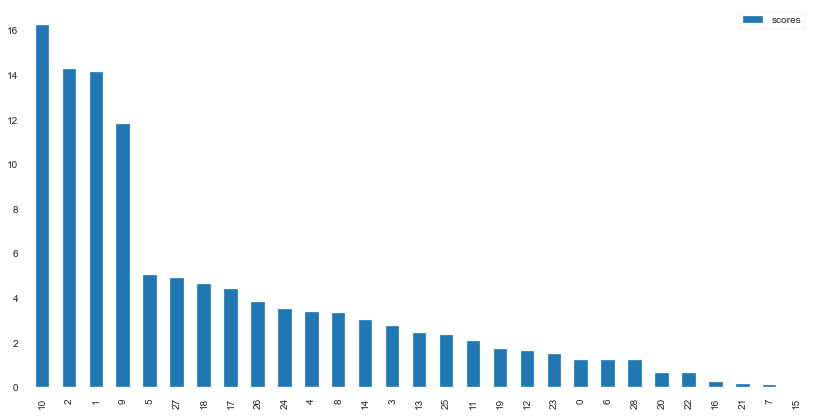

In [47]:
best_features.sort_values('scores', ascending = False).plot.bar()


In [ ]:
# Big drop off in feature importance at the 5th element which is Count_MF

In [ ]:
# Ok first time to clean up some of these variables. I'll begin with any variables dealing with money. The first thing i'll do is create boolean columns for ActBal_CA and ActBal_SA

In [190]:
df.head()

,Top_Value,Catagory_Label,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
Client,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1094,5.138571,2,0,1,0,0.000000,5.138571,0.0000,0,25,8,1,0.0,0.0,0.0,0.0,0.0,89.022500,0.0000,0.0,0.0,0.0,0.0,0.011786,0.011786,1.0,1.0,1366.313929,1366.313929,53.571429,351.950357,891.327857,31.0,31.0,1.0,21.0,4.0
1484,25.609107,3,1,0,1,25.609107,0.000000,8.7225,0,39,0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,1355.088571,1355.088571,5.0,5.0,768.625000,768.625000,107.142857,302.446429,357.785714,23.0,23.0,1.0,16.0,5.0
20,3.822500,2,0,1,0,0.000000,3.822500,0.0000,0,27,181,1,1.0,0.0,0.0,0.0,0.0,2194.472143,18302.0625,0.0,0.0,0.0,0.0,452.617500,451.550000,4.0,3.0,221.428571,221.428571,107.142857,10.714286,103.571429,7.0,7.0,3.0,1.0,3.0
1193,0.000000,0,0,0,0,0.000000,0.000000,0.0000,0,48,16,2,0.0,0.0,1.0,0.0,0.0,4180.697500,0.0000,0.0,0.0,0.0,0.0,1442.837857,1151.652857,23.0,21.0,1661.201071,1207.906429,507.142857,331.150000,75.178571,55.0,36.0,6.0,21.0,2.0
142,0.000000,0,0,0,0,0.000000,0.000000,0.0000,1,27,183,1,0.0,0.0,0.0,0.0,0.0,1511.683929,0.0000,0.0,0.0,0.0,0.0,714.285714,714.285714,1.0,1.0,728.107143,728.107143,0.000000,0.000000,725.928571,2.0,2.0,0.0,0.0,1.0


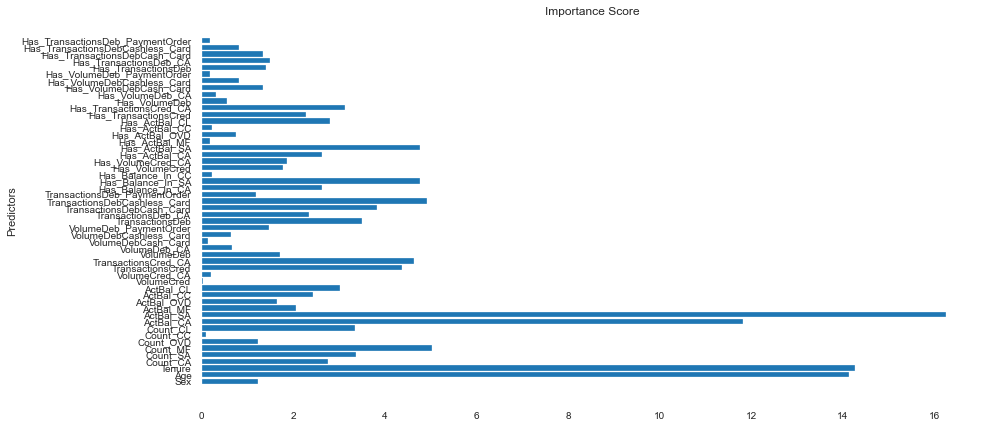

In [116]:
X = df.iloc[:, 8:]
predictors = X.columns

# Perform feature selection where `k` (5 in this case) indicates the number of features we wish to select
selector = SelectKBest(f_classif, k=10)
selector.fit(X[predictors], y)
importance_score = -np.log(selector.pvalues_)

# Plot each column with their importance score
plt.rcParams["figure.figsize"] = [14,7]
plt.barh(range(len(predictors)), importance_score, color='C0')
plt.ylabel("Predictors")
plt.title("Importance Score")
plt.yticks(range(len(predictors)), predictors)

plt.show()

In [117]:
best_features = pd.DataFrame({'features': predictors, 'scores': importance_score})
# Best 8 features
best_features.sort_values('scores', ascending = False).head(15)

,features,scores
10,ActBal_SA,16.246843
2,Tenure,14.259223
1,Age,14.127505
9,ActBal_CA,11.810057
5,Count_MF,5.031908
27,TransactionsDebCashless_Card,4.910082
35,Has_ActBal_SA,4.762137
30,Has_Balance_In_SA,4.762137
18,TransactionsCred_CA,4.639062
17,TransactionsCred,4.377732


In [1]:
 b_features = best_features.sort_values('scores', ascending = False).head(10).features
 print(b_features)

NameError: name 'best_features' is not defined

In [123]:
df[b_features]

,ActBal_SA,Tenure,Age,ActBal_CA,Count_MF,TransactionsDebCashless_Card,Has_ActBal_SA,Has_Balance_In_SA,TransactionsCred_CA,TransactionsCred
Client,,,,,,,,,,
1094,0.000000,8,25,89.022500,0.0,21.0,0.0,0.0,1.0,1.0
1484,0.000000,0,39,0.000000,0.0,16.0,0.0,0.0,5.0,5.0
20,18302.062500,181,27,2194.472143,0.0,1.0,1.0,1.0,3.0,4.0
1193,0.000000,16,48,4180.697500,0.0,21.0,0.0,0.0,21.0,23.0
142,0.000000,183,27,1511.683929,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1316,5861.004643,158,63,2145.810000,0.0,26.0,1.0,1.0,2.0,4.0
905,0.000000,11,37,4899.048214,0.0,0.0,0.0,0.0,2.0,2.0
938,52743.090714,33,57,7.576786,2.0,9.0,1.0,1.0,2.0,3.0


In [165]:
X = df[b_features]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
clf = GradientBoostingClassifier(random_state=0, n_estimators=40)
clf.fit(X_train, y_train)
clf.predict(X_test[:2])

clf.score(X_test, y_test)

0.48148148148148145

In [162]:

# No no for the tree model
clf = tree.DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)
clf.predict(X_test[:2])

clf.score(X_test, y_test)
#cross_val_score(clf, X, y, cv=10).mean()

0.35390946502057613

In [158]:
X = df.iloc[:, 8:]
clf = tree.DecisionTreeClassifier()
cross_val_score(clf, X, y.values, cv=10).mean()


0.362231529209622

In [168]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
clf.score(X_test, y_test)


0.48148148148148145

In [175]:
from sklearn.metrics import precision_recall_fscore_support,PrecisionRecallDisplay
p, r, f, s =precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f'precision {p} : Recall: {r}')

precision 0.31955321285140564 : Recall: 0.3062042124542124


In [ ]:
# ok i'm kind of hitting a brick wall here atm. I think this is because of the following
# 1. I need to stratify my train and test splits for one.b_features
# 2. There is too many people who don't belong to catagories meaning they don't make money  

In [177]:
df['Catagory_Label'].value_counts()

0    400
3    290
2    173
1    106
Name: Catagory_Label, dtype: int64

In [ ]:
# As a result of this I'm going to change my inital model to a binary classifier

In [232]:
X = df.iloc[:, 9:]
x.shape

(969, 49)

In [230]:
df.isnull().sum()

viable_candidate                    0
Top_Value                           0
Catagory_Label                      0
Sale_MF                             0
Sale_CC                             0
Sale_CL                             0
Revenue_MF                          0
Revenue_CC                          0
Revenue_CL                          0
Sex                                 0
Age                                 0
Tenure                              0
Count_CA                            0
Count_SA                            0
Count_MF                            0
Count_OVD                           0
Count_CC                            0
Count_CL                            0
ActBal_CA                           0
ActBal_SA                           0
ActBal_MF                           0
ActBal_OVD                          0
ActBal_CC                           0
ActBal_CL                           0
VolumeCred                          0
VolumeCred_CA                       0
Transactions

In [233]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
clf = GradientBoostingClassifier(random_state=0, n_estimators=40)
clf.fit(X_train, y_train)
clf.predict(X_test[:2])
clf.score(X_test, y_test)

0.588477366255144

In [ ]:
# Ok this model is at least better

In [236]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [237]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(name, score)

Nearest Neighbors 0.5185185185185185


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)